In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [2]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)
n = 28

In [3]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_2 = lambda x: A.T @ A

In [4]:
#var1 + var3
def Quasi_Newton(x0, func, t, grad, grad_2):
    xk = x0.copy()
    res = [func(xk)]
    L = np.max(np.linalg.eigh(A.T @ A)[0])
    hk = 1 / L
    for i in range(t):
        xk_prev = xk.copy()
        xk -= hk * np.linalg.inv(grad_2(xk)) @ grad(xk)
        delt_grad = grad(xk) - grad(xk_prev)
        delt_x = xk - xk_prev
        hk += (delt_x - hk * delt_grad) @ (delt_x - hk * delt_grad).T /  ((delt_x - hk * delt_grad) @ delt_grad)
        #bet = 1 + (delt_grad * delt_x) / ((hk * delt_grad) * delt_grad)
        #hk += ((hk * delt_grad) @ delt_x.T + delt_x @ delt_grad.T * hk) / (hk * delt_grad * delt_grad)
        #hk -= bet * ((hk * delt_grad) @ delt_grad.T * hk) / ((hk * delt_grad) * delt_grad)
        res.append(func(xk))
    return res  

In [9]:
res = Quasi_Newton(x0, func, 2000, grad, grad_2)

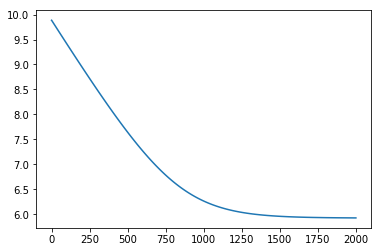

In [10]:
plt.plot(np.log(res))
plt.show()